## Data Cleaning with Python

In [ ]:
# Install the kaggle library, if not already installed
!pip install kaggle

# Create .kaggle folder in the root dir
!mkdir ~/.kaggle

In [ ]:
# Download API token and copy it to the .kaggle folder
!cp /Users/user/Downloads/kaggle.json /Users/user/.kaggle/kaggle.json

# Double-check if the api token is added
!cd /Users/user/.kaggle && ls

### Download the Dataset, Unzip the File, and Load it into a DataFrame

In [ ]:
# Download dataset using the Kaggle API
!kaggle datasets download -d aungpyaeap/supermarket-sales

In [4]:
# Unzip the kaggle dataset to get the csv file
import zipfile
zip_f = zipfile.ZipFile('supermarket-sales.zip')
zip_f.extractall()
zip_f.close()

In [5]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows', 1000)

In [6]:
# Store the data in a df
df_sales = pd.read_csv('supermarket_sales - Sheet1.csv')
df_sales.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


### Analyze the Descriptive Statistics Before Data Cleaning

In [7]:
# Review all available columns
df_sales.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [8]:
# Review the number of rows and columns
df_sales.shape

(1000, 17)

In [9]:
# Review the count of unique values in each column 
df_sales.nunique()

Invoice ID                 1000
Branch                        3
City                          3
Customer type                 2
Gender                        2
Product line                  6
Unit price                  943
Quantity                     10
Tax 5%                      990
Total                       990
Date                         89
Time                        506
Payment                       3
cogs                        990
gross margin percentage       1
gross income                990
Rating                       61
dtype: int64

- Some columns contain only a few unique values, which can be useful when making **comparative analysis**.

- The **Margin** column contains only **one distinct value**, making it redundant.

In [10]:
# Check the dtypes
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [11]:
# Summary of the most important descriptive stats
df_sales.describe() 

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


- The metric distributions are fairly balanced.

- There isn't much data to be cleaned.

- The mean values of the Quantity and Unit Price columns do not appear to be biased by abnormally high values, based on the min, max, and quartile values, making these columns suitable for analysis.

In [12]:
# Check for NULL values
df_sales.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

- No need to replace or fill NA values as there aren't any.

In [13]:
# Assessing that the margin column is not suitable for analysis
df_sales['gross margin percentage'].value_counts()

gross margin percentage
4.761905    1000
Name: count, dtype: int64

### Clean the Data and Improve its Quality

In [14]:
# Drop useless columns
df_sales.drop(columns=['Unit price', 'Tax 5%', 'Total', 'gross margin percentage'], inplace=True)
df_sales.head(20)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Quantity,Date,Time,Payment,cogs,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,7,1/5/2019,13:08,Ewallet,522.83,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,5,3/8/2019,10:29,Cash,76.40,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,7,3/3/2019,13:23,Credit card,324.31,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,8,1/27/2019,20:33,Ewallet,465.76,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,7,2/8/2019,10:37,Ewallet,604.17,30.2085,5.3
5,699-14-3026,C,Naypyitaw,Normal,Male,Electronic accessories,7,3/25/2019,18:30,Ewallet,597.73,29.8865,4.1
6,355-53-5943,A,Yangon,Member,Female,Electronic accessories,6,2/25/2019,14:36,Ewallet,413.04,20.6520,5.8
7,315-22-5665,C,Naypyitaw,Normal,Female,Home and lifestyle,10,2/24/2019,11:38,Ewallet,735.60,36.7800,8.0
8,665-32-9167,A,Yangon,Member,Female,Health and beauty,2,1/10/2019,17:15,Credit card,72.52,3.6260,7.2
9,692-92-5582,B,Mandalay,Member,Female,Food and beverages,3,2/20/2019,13:27,Credit card,164.52,8.2260,5.9


In [15]:
# Rename columns, replace spaces with underlines
df_sales.rename(columns={'Invoice ID': 'invoice_id', 'Branch': 'branch', 'City': 'city', 'Customer type': 'customer_type', 
                         'Gender': 'gender', 'Product line': 'product_line', 'Quantity': 'quantity', 'Date': 'date', 
                         'Time': 'time', 'Payment': 'payment', 'gross income': 'gross_profit', 'Rating': 'rating'}, inplace=True)

In [16]:
# Create new column for invoice month
df_sales['month'] = pd.to_datetime(df_sales['date']).dt.month.astype(np.int64)
df_sales['month'].value_counts()

month
1    352
3    345
2    303
Name: count, dtype: int64

In [ ]:
# Create new column for invoice hour(10am to 8pm)
df_sales['hour_24'] = pd.to_datetime(df_sales['time']).dt.hour.astype(np.int64)

In [18]:
# Drop date and time columns(replaced by month and hour columns)
df_sales.drop(columns=['date', 'time'], inplace=True)
df_sales.head(15)

,invoice_id,branch,city,customer_type,gender,product_line,quantity,payment,cogs,gross_profit,rating,month,hour_24
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,7,Ewallet,522.83,26.1415,9.1,1,13
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,5,Cash,76.40,3.8200,9.6,3,10
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,7,Credit card,324.31,16.2155,7.4,3,13
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,8,Ewallet,465.76,23.2880,8.4,1,20
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,7,Ewallet,604.17,30.2085,5.3,2,10
5,699-14-3026,C,Naypyitaw,Normal,Male,Electronic accessories,7,Ewallet,597.73,29.8865,4.1,3,18
6,355-53-5943,A,Yangon,Member,Female,Electronic accessories,6,Ewallet,413.04,20.6520,5.8,2,14
7,315-22-5665,C,Naypyitaw,Normal,Female,Home and lifestyle,10,Ewallet,735.60,36.7800,8.0,2,11
8,665-32-9167,A,Yangon,Member,Female,Health and beauty,2,Credit card,72.52,3.6260,7.2,1,17
9,692-92-5582,B,Mandalay,Member,Female,Food and beverages,3,Credit card,164.52,8.2260,5.9,2,13


In [19]:
# Round the profit values for improved readability
df_sales['gross_profit'] = np.round(df_sales['gross_profit'], 2)

In [20]:
# Combine branch and city into 1 column, due to their 1:1 relationship
df_sales['branch'] = df_sales['branch'].str.cat(df_sales['city'], sep="-")
df_sales.rename(columns={'branch': 'branch_city'}, inplace=True)

#Drop the city column 
df_sales.drop(columns=['city'], inplace=True)

In [21]:
# Confirm that each branch is connected to only one city
df_sales['branch_city'].value_counts()

branch_city
A-Yangon       340
B-Mandalay     332
C-Naypyitaw    328
Name: count, dtype: int64

In [22]:
df_sales.head()

,invoice_id,branch_city,customer_type,gender,product_line,quantity,payment,cogs,gross_profit,rating,month,hour_24
0,750-67-8428,A-Yangon,Member,Female,Health and beauty,7,Ewallet,522.83,26.14,9.1,1,13
1,226-31-3081,C-Naypyitaw,Normal,Female,Electronic accessories,5,Cash,76.40,3.82,9.6,3,10
2,631-41-3108,A-Yangon,Normal,Male,Home and lifestyle,7,Credit card,324.31,16.22,7.4,3,13
3,123-19-1176,A-Yangon,Member,Male,Health and beauty,8,Ewallet,465.76,23.29,8.4,1,20
4,373-73-7910,A-Yangon,Normal,Male,Sports and travel,7,Ewallet,604.17,30.21,5.3,2,10


### Analyze and Visualize the Relationships Between the Variables

In [23]:
# Review the relationships between the numerical variables
np.round(df_sales.corr(numeric_only=True),2)

,quantity,cogs,gross_profit,rating,month,hour_24
quantity,1.00,0.71,0.71,-0.02,-0.01,-0.01
cogs,0.71,1.00,1.00,-0.04,-0.02,-0.00
gross_profit,0.71,1.00,1.00,-0.04,-0.02,-0.00
rating,-0.02,-0.04,-0.04,1.00,-0.04,-0.03
month,-0.01,-0.02,-0.02,-0.04,1.00,0.04
hour_24,-0.01,-0.00,-0.00,-0.03,0.04,1.00


- There is **perfect positive correlation** between the cost and the profit.

- The **second-highest** correlations, both at 0.71, are between **quantity** and **cost**, and **quantity** and **profit**.

    - The higher the quantity, the higher the cost and profit, and vice versa.

- The Rating, Month and Hour columns are **almost fully independent** from the other columns.

In [24]:
# Order the dataset by branch_city and month
df_sales.sort_values(by=['branch_city', 'month'], inplace=True)

In [25]:
# Reset the index after the data cleaning
df_sales.reset_index(inplace=True)

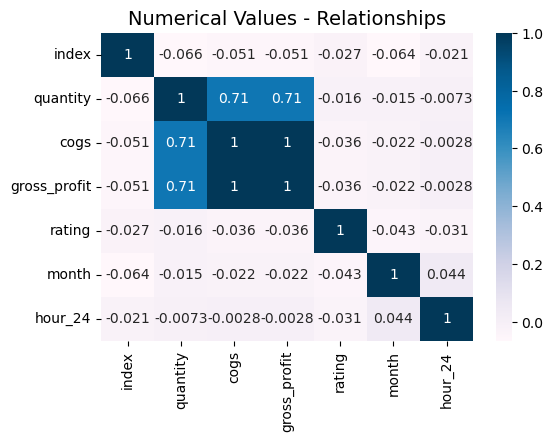

In [26]:
# Plot a correlation heatmap
fig, ax = plt.subplots(figsize=(6,4))
sns.heatmap(df_sales.corr(numeric_only=True), annot=True, cmap='PuBu')
ax.set_title('Numerical Values - Relationships', fontsize=14)
plt.show()

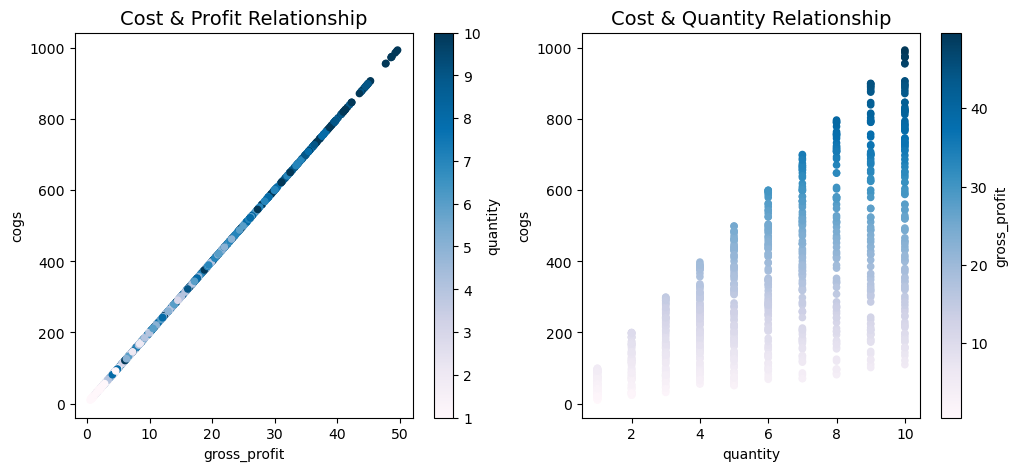

In [27]:
# Scatter Plots for important value-pairs
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Relationship between Cost & Profit
df_sales.plot.scatter(x='gross_profit', y='cogs', c='quantity', cmap='PuBu', grid=False, ax=ax[0])
ax[0].set_title('Cost & Profit Relationship', fontsize=14)

# Relationship between Cost & Quantity Sold
df_sales.plot.scatter(x='quantity', y='cogs', c='gross_profit', cmap='PuBu', grid=False, ax=ax[1])
ax[1].set_title('Cost & Quantity Relationship', fontsize=14)

plt.show()

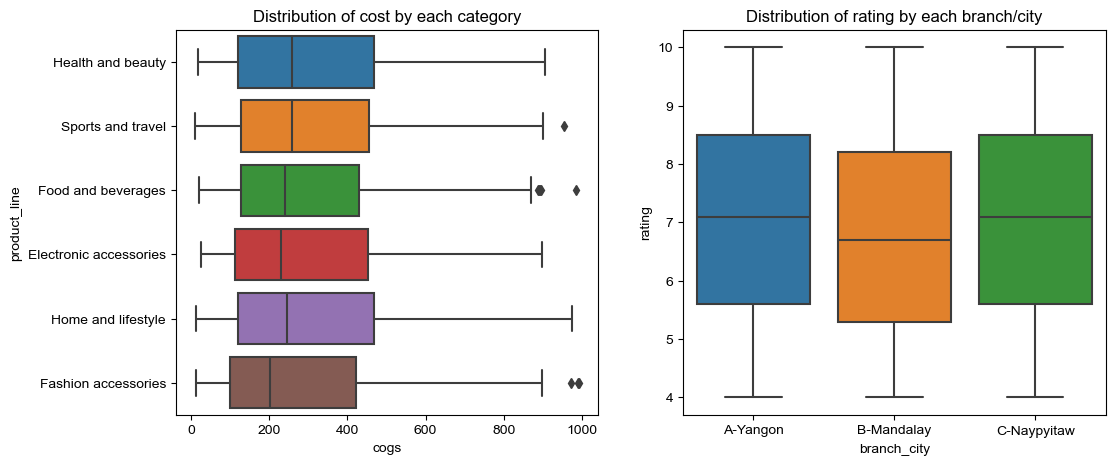

In [28]:
# Boxplots for reviewing distributions 
fig, ax = plt.subplots(1,2,figsize=(12,5))

# Distribution of cost by each category
sns.set_style('whitegrid')
sns.boxplot(x='cogs', y='product_line', data=df_sales, ax=ax[0]).set_title('Distribution of cost by each category')

# Distribution of rating by each branch/city
sns.set_style('whitegrid')
sns.boxplot(x='branch_city', y='rating', data=df_sales, ax=ax[1]).set_title('Distribution of rating by each branch/city')

plt.show()

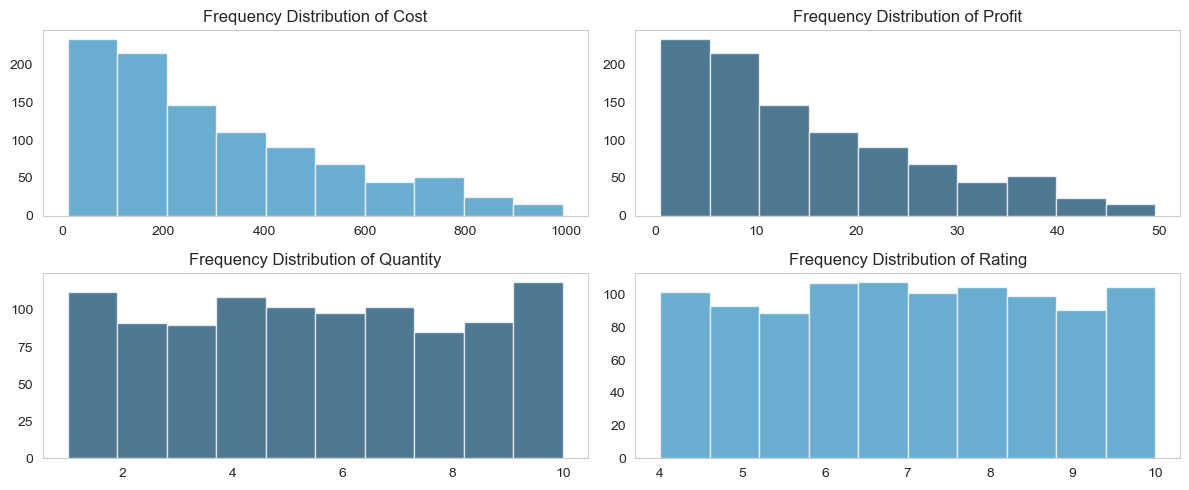

In [29]:
# Plot Frequency Distribution of the numerical variables
fig, ax = plt.subplots(2,2,figsize=(12,5))

df_sales.hist('cogs', bins=10, alpha=0.7, ax=ax[0,0], grid=False, color='#2D8ABE')
ax[0,0].set_title('Frequency Distribution of Cost')

df_sales.hist('quantity', bins=10, alpha=0.7, grid=False, ax=ax[1,0], color='#044165')
ax[1,0].set_title('Frequency Distribution of Quantity')

df_sales.hist('gross_profit', bins=10, alpha=0.7, grid=False, ax=ax[0,1], color='#044165')
ax[0,1].set_title('Frequency Distribution of Profit')

df_sales.hist('rating', bins=10, alpha=0.7,grid=False, ax=ax[1,1], color='#2D8ABE')
ax[1,1].set_title('Frequency Distribution of Rating')

plt.tight_layout()
plt.show()

- **Cost** and **Profit** are both **right-skewed**.

- **Quantity** and **Rating** have nearly perfect **uniform distributions**.

#### Connect to the MSSQL Database

In [ ]:
import sqlalchemy as sal 

# SQL Server connection details
server = ''
database = ''
username = ''
password = ''
driver = ''  # Path to the ODBC driver on Mac

# Create the connection string
conn_str = f'mssql+pyodbc://{username}:{password}@{server}/{database}?driver={driver}&encrypt=no'

# Create SQLAlchemy engine
engine = sal.create_engine(conn_str)

# Connect to the database
conn = engine.connect()

print(conn)

In [ ]:
# Load the data into SQL Server with the append option
df_sales.to_sql('df_sales', con=conn, index=False, if_exists='append')